In [17]:
# Import helpful libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
home_data.drop(['SalePrice'], axis = 1, inplace = True)

X = home_data.select_dtypes(exclude=['object'])

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,149


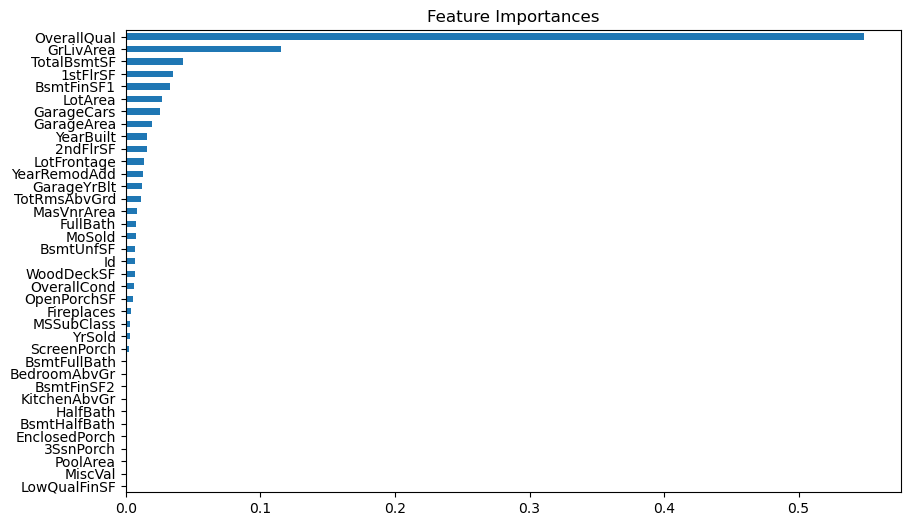

In [13]:
importances = rf_model.feature_importances_
feature_names = train_X.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances")
plt.show()

In [15]:
# Hyperparameter grid search
esti = [25, 50, 100, 150, 200]
depth = [15, 18, 20, 25, 30]
featrue = [2, 3, 4, 5, 6]
samples = [2, 3, 4, 5, 6]

result = []

for i in range(5):   
    for j in range(5):
        for k in range(5):
            for l in range(5):
                rf_model_on_full_data = RandomForestRegressor(
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)

                result.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })

result_frame = pd.DataFrame(result)
sort_result_frame = result_frame.sort_values(by = "mae")
sort_result_frame.mae = sort_result_frame["mae"].astype(float).round(0)
sort_result_frame

,n_estimators,max_depth,max_features,min_samples_split,mae
392,150,15,5,4,16847.0
345,100,25,6,2,16863.0
445,150,20,6,2,16872.0
571,200,20,6,3,16877.0
570,200,20,6,2,16883.0
...,...,...,...,...,...
53,25,20,2,5,19687.0
102,25,30,2,4,19757.0
75,25,25,2,2,19809.0
0,25,15,2,2,19889.0


In [21]:
maee = sort_result_frame[sort_result_frame.mae < 18000.0]
maee

,n_estimators,max_depth,max_features,min_samples_split,mae
392,150,15,5,4,16847.0
345,100,25,6,2,16863.0
445,150,20,6,2,16872.0
571,200,20,6,3,16877.0
570,200,20,6,2,16883.0
...,...,...,...,...,...
131,50,15,3,3,17961.0
584,200,25,3,6,17965.0
609,200,30,3,6,17965.0
135,50,15,4,2,17989.0


In [41]:
train_X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

<Axes: xlabel='n_estimators', ylabel='mae'>

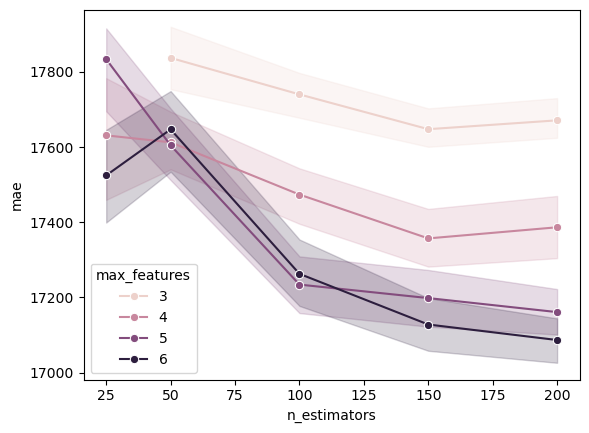

In [33]:
sns.lineplot(x='n_estimators', y='mae', hue='max_features', data=maee, marker="o")

<Axes: xlabel='n_estimators', ylabel='mae'>

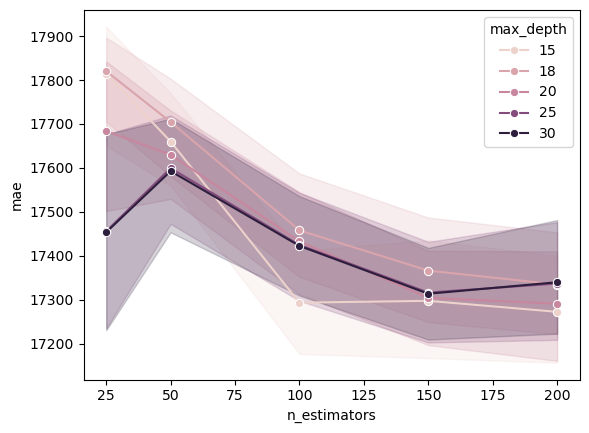

In [23]:
sns.lineplot(x='n_estimators', y='mae', hue='max_depth', data=maee, marker="o")

<Axes: xlabel='n_estimators', ylabel='mae'>

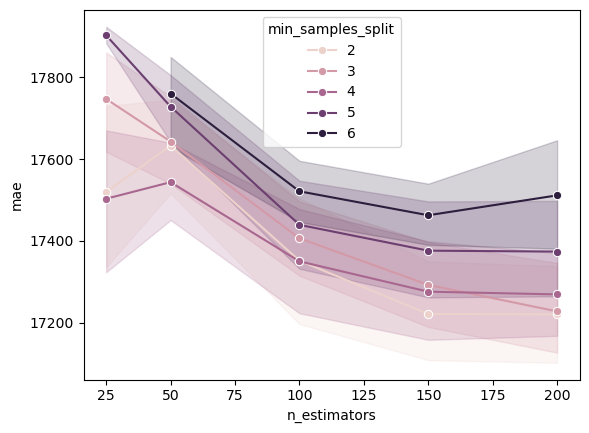

In [25]:
sns.lineplot(x='n_estimators', y='mae', hue='min_samples_split', data=maee, marker="o")

<Axes: xlabel='max_depth', ylabel='mae'>

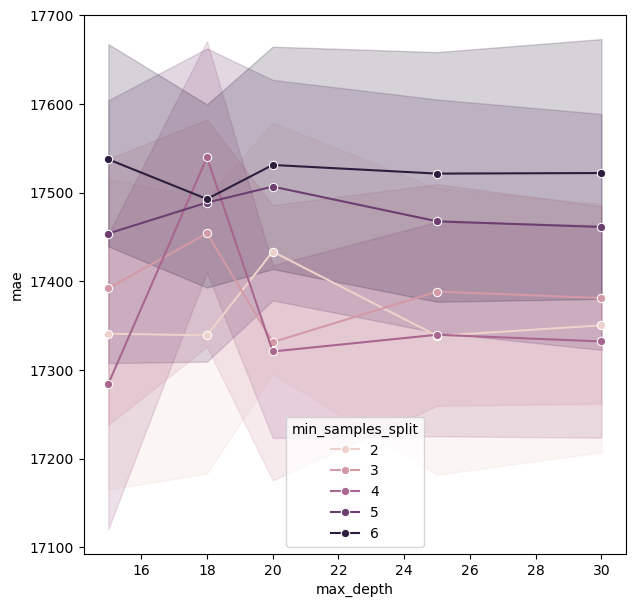

In [51]:
plt.figure(figsize = (7,7))
sns.lineplot(x='max_depth', y='mae', hue='min_samples_split', data=maee, marker="o")

In [43]:
esti = [100, 125, 150, 175, 200]
depth = [15, 16, 17, 18, 19, 20]
featrue = [5, 10, 15, 20, 25, 30]
samples = [2, 3, 4]
result_2 = []
for i in range(len(esti)):   
    for j in range(len(depth)):
        for k in range(len(featrue)):
            for l in range(len(samples)):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                result_2.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })
            

In [45]:
result_frame_2 = pd.DataFrame(result_2)
sort_result_frame_2 = result_frame_2.sort_values(by = "mae")
sort_result_frame_2.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
117,125,15,20,2,16094.601868
225,150,15,20,2,16183.554108
9,100,15,20,2,16207.749485
96,100,20,15,2,16249.572692
153,125,17,20,2,16276.584032


In [63]:
model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = 125,
                    max_depth = 15,
                    max_features = 20,
                    min_samples_split = 2,
                    random_state=1)
                
model_on_full_data.fit(train_X, train_y)
pred = rf_model_on_full_data.predict(val_X)
mae = mean_absolute_error(pred, val_y)

In [59]:
print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

Validation MAE for Random Forest Model: 16,743


In [65]:
rf_model_on_full_data = RandomForestRegressor(n_estimators = 125, max_depth = 15, max_features = 20, min_samples_split = 2, random_state=1)
                
rf_model_on_full_data.fit(train_X, train_y)
pred = rf_model_on_full_data.predict(val_X)
mae = mean_absolute_error(pred, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

Validation MAE for Random Forest Model: 16,095


In [69]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [71]:
Test = test_data.select_dtypes(exclude=['object'])
Test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [73]:
rf_model_on_full_data = RandomForestRegressor(n_estimators = 125, max_depth = 15, max_features = 20, min_samples_split = 2, random_state=1)
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(max_depth=15, max_features=20, n_estimators=125,
                      random_state=1)

In [75]:
pred = rf_model_on_full_data.predict(Test)
pred

array([128675.06206907, 154888.46652113, 178947.34652913, ...,
       160417.60589011, 109395.0645291 , 241354.80311092])

In [77]:
predicted = pd.DataFrame({
    "Id": test_data.Id,
    "SalePrice": pred
})
predicted

,Id,SalePrice
0,1461,128675.062069
1,1462,154888.466521
2,1463,178947.346529
3,1464,182509.500504
4,1465,194838.188624
...,...,...
1454,2915,82438.778693
1455,2916,85096.229899
1456,2917,160417.605890
1457,2918,109395.064529


In [79]:
predicted.to_csv('submission.csv',  index=False)

In [81]:
submission = pd.read_csv("submission.csv")
submission

,Id,SalePrice
0,1461,128675.062069
1,1462,154888.466521
2,1463,178947.346529
3,1464,182509.500504
4,1465,194838.188624
...,...,...
1454,2915,82438.778693
1455,2916,85096.229899
1456,2917,160417.605890
1457,2918,109395.064529
